In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
import joblib
import math
import lasio

In [2]:
df=lasio.read(r'C:\Users\absid\Downloads\RHOB and DRHO prrediction\15_9-13.las').df()

In [3]:
df.head()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,MUDWEIGHT,ROP,RDEP,RSHA,RMED,RXO,SP,DTC,NPHI,PEF,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,
25.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.224609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.224625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.224655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.224670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.224701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['FORCE_2020_LITHOFACIES_CONFIDENCE', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'CALI', 'MUDWEIGHT', 'ROP', 'RDEP', 'RSHA', 'RMED', 'RXO', 'SP', 'DTC',
       'NPHI', 'PEF', 'GR', 'RHOB', 'DRHO', 'DEPTH_MD', 'X_LOC', 'Y_LOC',
       'Z_LOC'],
      dtype='object')

In [5]:
df=df.drop(columns=['FORCE_2020_LITHOFACIES_CONFIDENCE', 'FORCE_2020_LITHOFACIES_LITHOLOGY','RDEP', 'RSHA', 'RMED', 'RXO','X_LOC', 'Y_LOC',
       'Z_LOC'])

In [6]:
df=df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 12097 entries, 1138.704 to 2993.864
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CALI       12097 non-null  float64
 1   MUDWEIGHT  12097 non-null  float64
 2   ROP        12097 non-null  float64
 3   SP         12097 non-null  float64
 4   DTC        12097 non-null  float64
 5   NPHI       12097 non-null  float64
 6   PEF        12097 non-null  float64
 7   GR         12097 non-null  float64
 8   RHOB       12097 non-null  float64
 9   DRHO       12097 non-null  float64
 10  DEPTH_MD   12097 non-null  float64
dtypes: float64(11)
memory usage: 1.1 MB


In [8]:
df=df.reset_index()

In [9]:
df.head()

,DEPT,CALI,MUDWEIGHT,ROP,SP,DTC,NPHI,PEF,GR,RHOB,DRHO,DEPTH_MD
0,1138.704,19.322735,0.131809,84.680267,45.547737,147.837677,0.765867,1.631495,55.892757,1.774626,0.017014,1138.703980
1,1138.856,18.613674,0.131809,84.598869,45.914387,142.382431,0.800262,1.645080,60.929138,1.800986,0.003747,1138.855957
2,1139.008,18.212072,0.131809,80.529831,46.039104,138.258331,0.765957,1.645873,62.117264,1.817696,-0.000257,1139.008057
3,1139.160,18.134182,0.131809,59.596161,46.826984,139.198914,0.702521,1.620216,61.010860,1.829333,0.002608,1139.160034
4,1139.312,18.033762,0.131809,56.803669,46.950382,144.290085,0.639708,1.504854,58.501236,1.813854,0.005400,1139.312012


In [10]:
df=df.drop(columns=['DEPTH_MD'])

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEPT,12097.0,2066.415601,535.562821,1138.704000,1607.320000,2066.968000,2526.616000,2993.864000
CALI,12097.0,13.734572,3.435240,8.186605,12.237584,13.343526,14.934777,23.329569
MUDWEIGHT,12097.0,0.140055,0.007822,0.131809,0.135404,0.136602,0.143792,0.156973
ROP,12097.0,25.685723,29.636481,0.138586,4.494784,29.946920,39.327724,1083.425415
SP,12097.0,74.095070,22.601568,35.847466,57.253933,64.793503,88.027596,134.997940
DTC,12097.0,121.553370,30.284184,55.726753,90.053207,138.616379,146.256546,163.910797
NPHI,12097.0,0.415582,0.138671,0.037976,0.314568,0.467966,0.514173,0.800262
PEF,12097.0,3.914815,1.820981,1.126667,2.631487,3.367436,4.683676,17.026619
GR,12097.0,61.426373,29.896585,6.191506,42.906895,63.099358,77.874214,499.022583
RHOB,12097.0,2.148925,0.251237,1.493417,1.982761,2.059197,2.384051,2.889454


In [12]:
df.corr().transpose()

,DEPT,CALI,MUDWEIGHT,ROP,SP,DTC,NPHI,PEF,GR,RHOB,DRHO
DEPT,1.000000,-0.460703,0.815180,-0.501907,0.917646,-0.810985,-0.681476,0.442268,-0.076846,0.803250,0.259505
CALI,-0.460703,1.000000,-0.642127,0.362781,-0.596699,0.503872,0.526807,0.007832,-0.261430,-0.580553,-0.075363
MUDWEIGHT,0.815180,-0.642127,1.000000,-0.457016,0.909775,-0.725381,-0.643840,0.360190,0.196466,0.751895,0.194523
ROP,-0.501907,0.362781,-0.457016,1.000000,-0.497632,0.510632,0.450196,-0.260943,0.049798,-0.460195,-0.078534
SP,0.917646,-0.596699,0.909775,-0.497632,1.000000,-0.780342,-0.667897,0.401782,0.132257,0.802973,0.250963
DTC,-0.810985,0.503872,-0.725381,0.510632,-0.780342,1.000000,0.906907,-0.381615,0.327219,-0.889345,-0.071019
NPHI,-0.681476,0.526807,-0.643840,0.450196,-0.667897,0.906907,1.000000,-0.256342,0.357256,-0.869968,0.061430
PEF,0.442268,0.007832,0.360190,-0.260943,0.401782,-0.381615,-0.256342,1.000000,-0.186976,0.202818,0.330978
GR,-0.076846,-0.261430,0.196466,0.049798,0.132257,0.327219,0.357256,-0.186976,1.000000,-0.131954,0.252986
RHOB,0.803250,-0.580553,0.751895,-0.460195,0.802973,-0.889345,-0.869968,0.202818,-0.131954,1.000000,0.048746


In [13]:
df=df.drop(columns=['MUDWEIGHT'])

In [14]:
df.corr().transpose()

,DEPT,CALI,ROP,SP,DTC,NPHI,PEF,GR,RHOB,DRHO
DEPT,1.000000,-0.460703,-0.501907,0.917646,-0.810985,-0.681476,0.442268,-0.076846,0.803250,0.259505
CALI,-0.460703,1.000000,0.362781,-0.596699,0.503872,0.526807,0.007832,-0.261430,-0.580553,-0.075363
ROP,-0.501907,0.362781,1.000000,-0.497632,0.510632,0.450196,-0.260943,0.049798,-0.460195,-0.078534
SP,0.917646,-0.596699,-0.497632,1.000000,-0.780342,-0.667897,0.401782,0.132257,0.802973,0.250963
DTC,-0.810985,0.503872,0.510632,-0.780342,1.000000,0.906907,-0.381615,0.327219,-0.889345,-0.071019
NPHI,-0.681476,0.526807,0.450196,-0.667897,0.906907,1.000000,-0.256342,0.357256,-0.869968,0.061430
PEF,0.442268,0.007832,-0.260943,0.401782,-0.381615,-0.256342,1.000000,-0.186976,0.202818,0.330978
GR,-0.076846,-0.261430,0.049798,0.132257,0.327219,0.357256,-0.186976,1.000000,-0.131954,0.252986
RHOB,0.803250,-0.580553,-0.460195,0.802973,-0.889345,-0.869968,0.202818,-0.131954,1.000000,0.048746
DRHO,0.259505,-0.075363,-0.078534,0.250963,-0.071019,0.061430,0.330978,0.252986,0.048746,1.000000


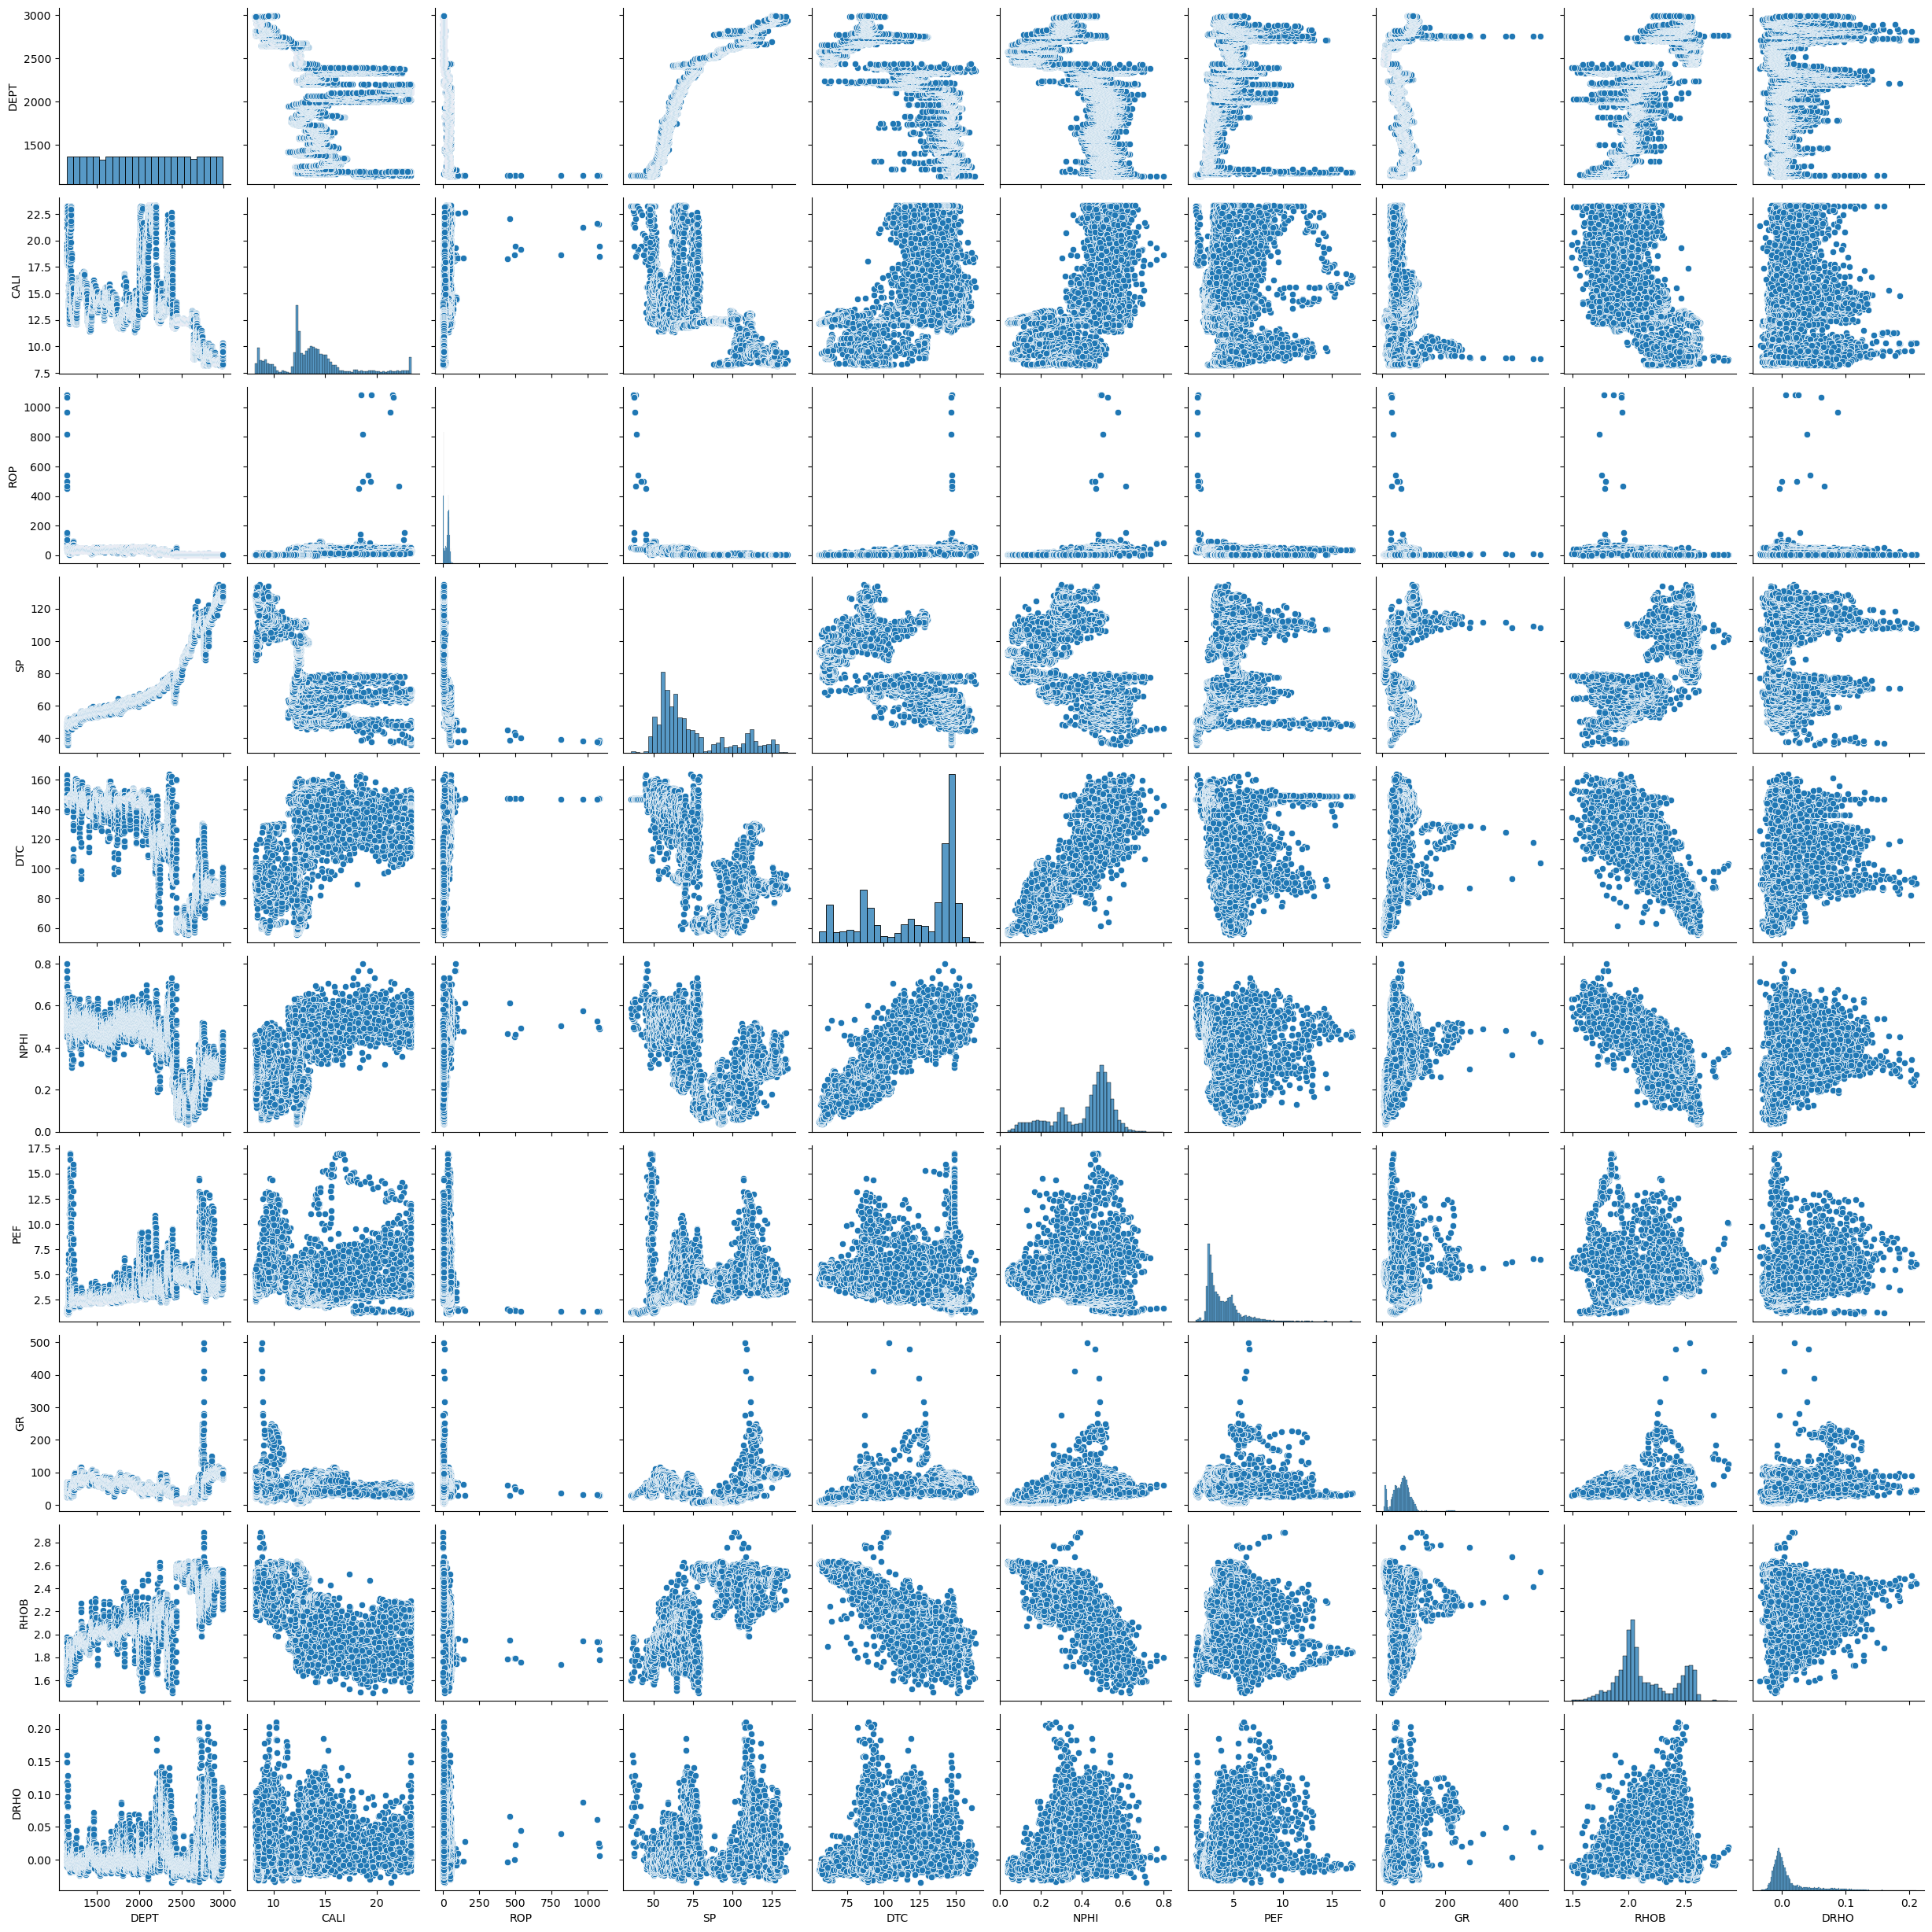

In [15]:
sns.pairplot(df)

In [16]:
df.columns

Index(['DEPT', 'CALI', 'ROP', 'SP', 'DTC', 'NPHI', 'PEF', 'GR', 'RHOB',
       'DRHO'],
      dtype='object')

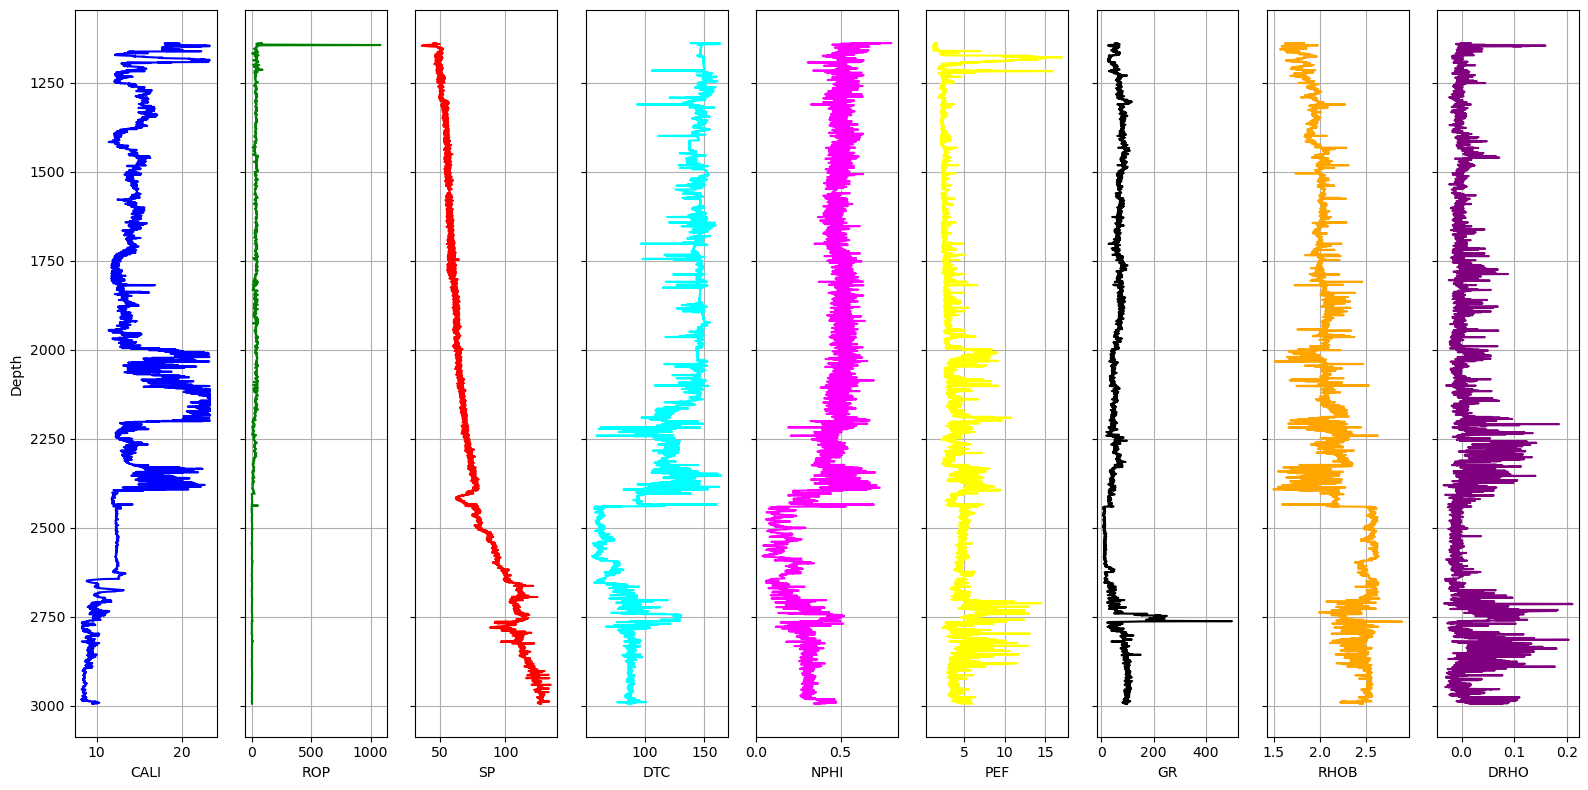

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 9, sharey=True, figsize=(16, 8))

logs = ['CALI','ROP','SP','DTC','NPHI','PEF','GR','RHOB','DRHO']
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']

for i, log in enumerate(logs):
    axs[i].plot(df[log], df['DEPT'], color=colors[i])
    axs[i].set_xlabel(log)
    axs[i].grid(True)
    axs[i].invert_yaxis()

axs[0].set_ylabel('Depth')

plt.tight_layout()
plt.show()

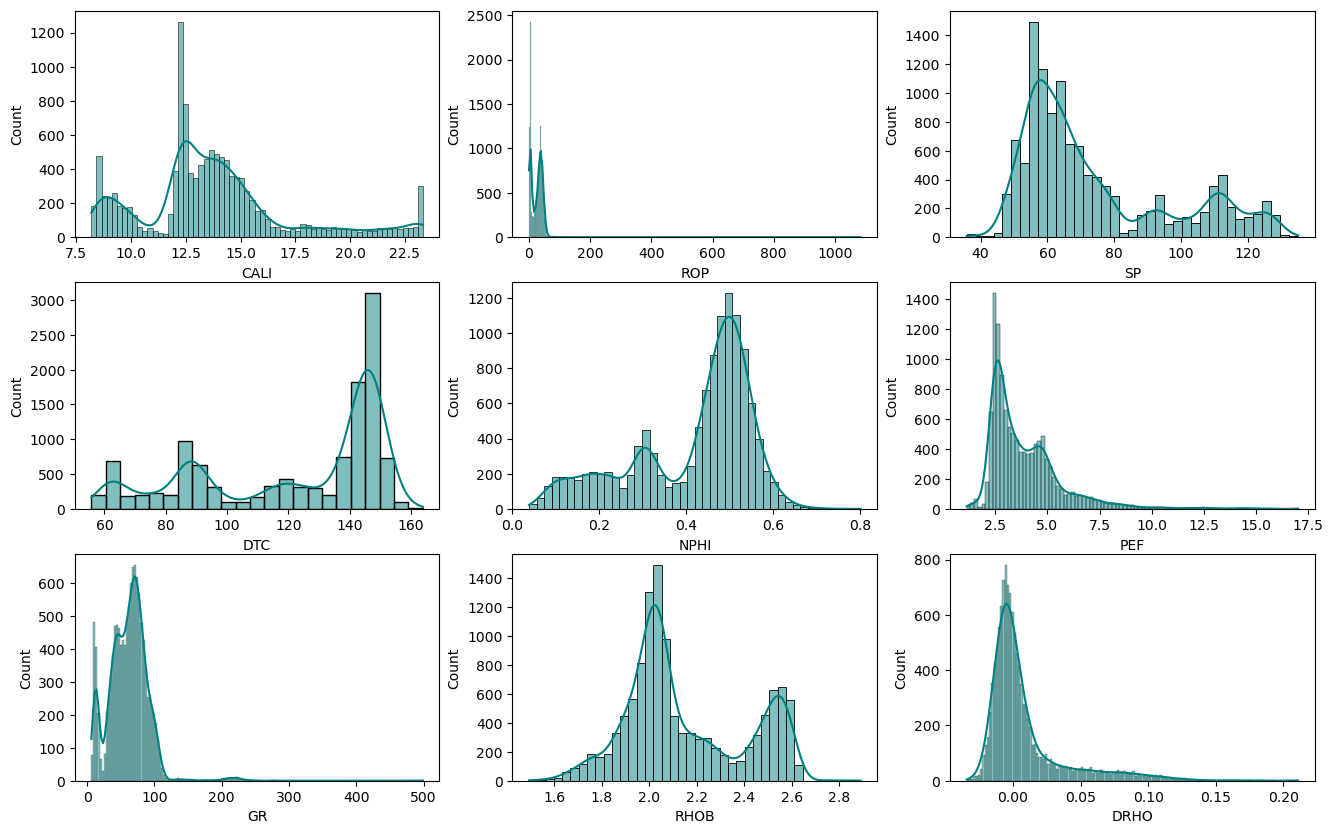

In [18]:
fig, axs = plt.subplots(3, 3, figsize=(16, 10))

sns.histplot(data=df, x='CALI', kde=True, color="teal", ax=axs[0, 0])
sns.histplot(data=df, x='ROP', kde=True, color="teal",ax=axs[0, 1])
sns.histplot(data=df, x='SP', kde=True, color="teal",ax=axs[0, 2])
sns.histplot(data=df, x= 'DTC', kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=df, x='NPHI', kde=True, color="teal",ax=axs[1, 1])
sns.histplot(data=df, x='PEF', kde=True, color="teal",ax=axs[1, 2])
sns.histplot(data=df, x='GR', kde=True, color="teal",ax=axs[2, 0])
sns.histplot(data=df, x= 'RHOB', kde=True, color="teal", ax=axs[2, 1])
sns.histplot(data=df, x= 'DRHO', kde=True, color="teal", ax=axs[2, 2])
plt.show()

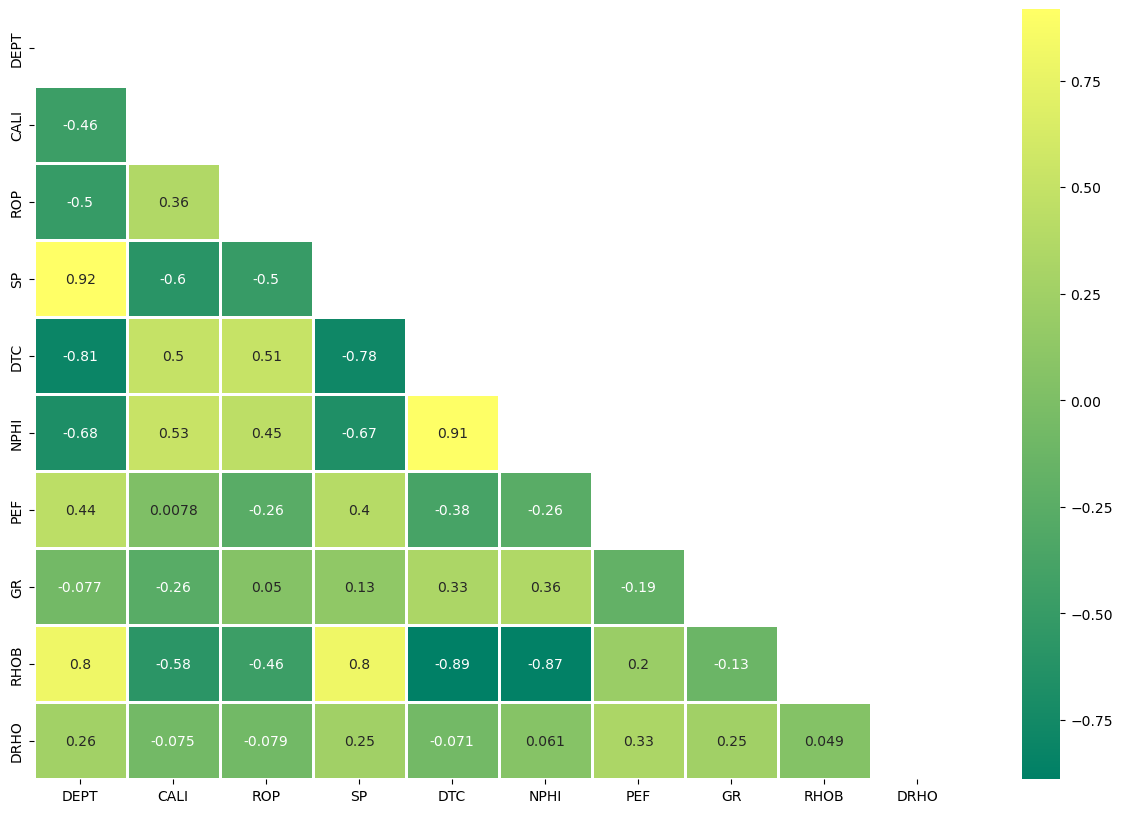

In [19]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, mask=mask, linecolor='white', linewidths=2, cmap='summer')

plt.show()

# Predicition of RHOB and DRHO

In [20]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(df)
df_scaled=scaler.transform(df)

In [21]:
df.columns

Index(['DEPT', 'CALI', 'ROP', 'SP', 'DTC', 'NPHI', 'PEF', 'GR', 'RHOB',
       'DRHO'],
      dtype='object')

In [22]:
df_scaled=pd.DataFrame(df_scaled, columns=['DEPT', 'CALI', 'ROP', 'SP', 'DTC', 'NPHI', 'PEF', 'GR', 'RHOB',
       'DRHO'])

y_scaled=df_scaled[['RHOB','DRHO']]
x_scaled=df_scaled.drop(['RHOB',
       'DRHO'], axis=1)

print(x_scaled)
print(y_scaled)

           DEPT      CALI       ROP        SP       DTC      NPHI       PEF  \
0      0.000000  0.735400  0.078042  0.097834  0.851428  0.954879  0.031750   
1      0.000082  0.688575  0.077967  0.101532  0.801002  1.000000  0.032605   
2      0.000164  0.662054  0.074210  0.102790  0.762881  0.954997  0.032655   
3      0.000246  0.656911  0.054886  0.110736  0.771576  0.871779  0.031041   
4      0.000328  0.650279  0.052308  0.111980  0.818636  0.789378  0.023785   
...         ...       ...       ...       ...       ...       ...       ...   
12092  0.999672  0.092071  0.003325  0.915212  0.284218  0.398220  0.224688   
12093  0.999754  0.097088  0.003325  0.916722  0.281565  0.410751  0.224688   
12094  0.999836  0.091301  0.003325  0.915209  0.296449  0.428981  0.224688   
12095  0.999918  0.085897  0.003305  0.919816  0.299320  0.432052  0.257713   
12096  1.000000  0.085319  0.003149  0.925505  0.307157  0.447475  0.309642   

             GR  
0      0.100848  
1      0.111068

In [23]:
seed= 1000
np.random.seed(seed)
X_train,X_test,y_train, y_test= train_test_split(x_scaled, y_scaled, test_size=0.30)

# Using Multioutput Regressor

In [24]:
from sklearn.multioutput import MultiOutputRegressor
np.random.seed(seed)

# SVR

In [25]:
from sklearn.svm import SVR

SVM = MultiOutputRegressor((SVR(kernel='rbf', gamma=5,C=1)))

SVM.fit(X_train,y_train)
y_pred_train=SVM.predict(X_train)
y_pred_test=SVM.predict(X_test)

In [26]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Testing R-squared score:', round(r2_score(y_test['RHOB'], y_pred_test[:,0]), 4))
print('Testing MAE:', round(metrics.mean_absolute_error(y_test['RHOB'], y_pred_test[:,0]), 4))
print('Testing MSE:', round(metrics.mean_squared_error(y_test['RHOB'], y_pred_test[:,0]), 4))
print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test['RHOB'], y_pred_test[:,0])), 4))


Testing R-squared score: 0.9259
Testing MAE: 0.0382
Testing MSE: 0.0024
Testing RMSE: 0.0492


In [27]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Testing R-squared score:', round(r2_score(y_test['DRHO'], y_pred_test[:,1]), 4))
print('Testing MAE:', round(metrics.mean_absolute_error(y_test['DRHO'], y_pred_test[:,1]), 4))
print('Testing MSE:', round(metrics.mean_squared_error(y_test['DRHO'], y_pred_test[:,1]), 4))
print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test['DRHO'], y_pred_test[:,1])), 4))

Testing R-squared score: 0.6253
Testing MAE: 0.0531
Testing MSE: 0.0057
Testing RMSE: 0.0753


In [28]:
from sklearn.model_selection import GridSearchCV 
param_grid={'gamma':[1,2,3],'C':[0.1,1,100],'kernel':['rbf','poly'],'degree':[2,3]}
grid=MultiOutputRegressor(GridSearchCV(SVR(),param_grid))
grid.fit(X_train,y_train)

In [ ]:
y_pred_train=grid.predict(X_train)
y_pred_test=grid.predict(X_test)

In [ ]:
print('Testing R-squared score:', round(r2_score(y_test['RHOB'], y_pred_test[:,0]), 4))
print('Testing MAE:', round(metrics.mean_absolute_error(y_test['RHOB'], y_pred_test[:,0]), 4))
print('Testing MSE:', round(metrics.mean_squared_error(y_test['RHOB'], y_pred_test[:,0]), 4))
print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test['RHOB'], y_pred_test[:,0])), 4))

In [ ]:
print('Testing R-squared score:', round(r2_score(y_test['DRHO'], y_pred_test[:,1]), 4))
print('Testing MAE:', round(metrics.mean_absolute_error(y_test['DRHO'], y_pred_test[:,1]), 4))
print('Testing MSE:', round(metrics.mean_squared_error(y_test['DRHO'], y_pred_test[:,1]), 4))
print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test['DRHO'], y_pred_test[:,1])), 4))